In [12]:
import sys
sys.path.insert(0,'/Users/august/Coding/topic-modelling')

In [13]:
from topic_modelling.data_loader import DataLoader
from topic_modelling.LDA import LDA
import seaborn as sns
from sklearn.decomposition import PCA

data_path = "../data/abcnews_lem_stem.pickle"
dl = DataLoader()
n_rows = 100000
corpus = dl.load(data_path, n_rows=n_rows)
num_topics = 9
lda = LDA(corpus)

lda.fit(verbosity=False, num_topics=num_topics, iterations=50)

Read processed data from: ../data/abcnews_lem_stem.pickle


In [14]:
topics, _ = lda.get_topics()
for topic in topics:
    print(topic)

['govt', 'fund', 'health', 'call', 'urg', 'plan', 'nsw', 'servic', 'group', 'boost', 'hospit', 'say', 'minist', 'vic', 'new', 'act', 'chang', 'claim', 'indigen', 'qld']
['kill', 'polic', 'crash', 'man', 'miss', 'dead', 'bomb', 'attack', 'two', 'car', 'death', 'blast', 'fire', 'search', 'accid', 'three', 'injur', 'found', 'investig', 'probe']
['plan', 'council', 'new', 'boost', 'get', 'mayor', 'coast', 'consid', 'fund', 'water', 'centr', 'group', 'develop', 'call', 'govt', 'mine', 'resid', 'rise', 'chang', 'seek']
['win', 'cup', 'world', 'final', 'lead', 'open', 'england', 'set', 'back', 'top', 'titl', 'take', 'aussi', 'test', 'tour', 'play', 'injuri', 'clash', 'coach', 'first']
['iraq', 'say', 'talk', 'iraqi', 'report', 'new', 'bush', 'korea', 'troop', 'trade', 'war', 'deal', 'north', 'leader', 'howard', 'free', 'east', 'minist', 'china', 'israel']
['fire', 'new', 'work', 'worker', 'strike', 'nation', 'say', 'back', 'sydney', 'union', 'fine', 'ban', 'probe', 'set', 'begin', 'claim', 't

In [15]:
topic_matrix = lda.topic_word_matrix

In [16]:
categories = ['topic ' + str(i+1) for i in range(num_topics)]

In [17]:
pca = PCA(n_components=9).fit(topic_matrix)
X_pca = pca.transform(topic_matrix)

In [33]:
def get_best_topic(array):
    return np.argmax(array)

In [37]:
import numpy as np
topic_assignments = np.apply_along_axis(get_best_topic, 0, topic_matrix)

In [43]:
sizes = np.unique(topic_assignments, return_counts=True)[1]

In [44]:
data = {
    "x1": X_pca[:,0],
    "x2": X_pca[:, 1],
    "weight": sizes
    }

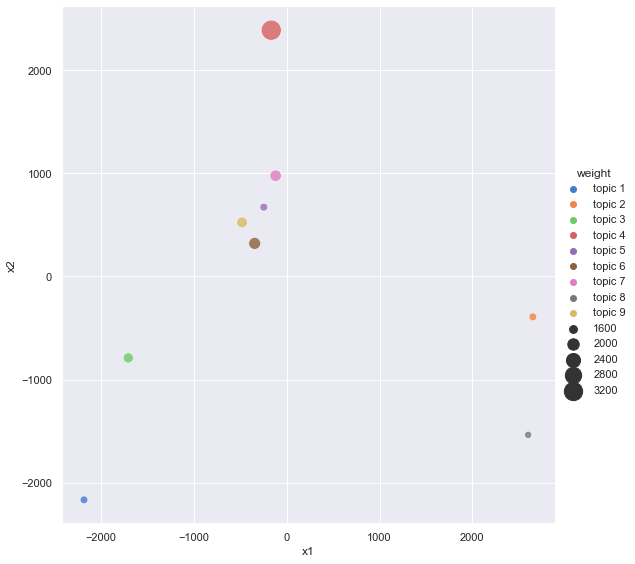

In [45]:
sns.set(rc={'figure.figsize':(20,20)})
relplot = sns.relplot(
    x="x1", y="x2", hue=categories, size="weight",
    sizes=(50, 400), alpha=0.8, palette="muted",
    data=data, legend="auto", height=8)
fig = relplot.fig
fig.savefig(f"../topic_modelling/images/LDA/PCA/PCA_{n_rows}x{num_topics}.png") 